In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\Usuario\Desktop\PY.xlsx')
df

,FECHA,VENTA
0,1,21518.7
1,2,25620.2
2,3,30081.3
3,4,37778.7
4,5,44386.5
5,6,45714.3
6,7,47699.5
7,8,50299.3
8,9,58703.2
9,10,69136.7


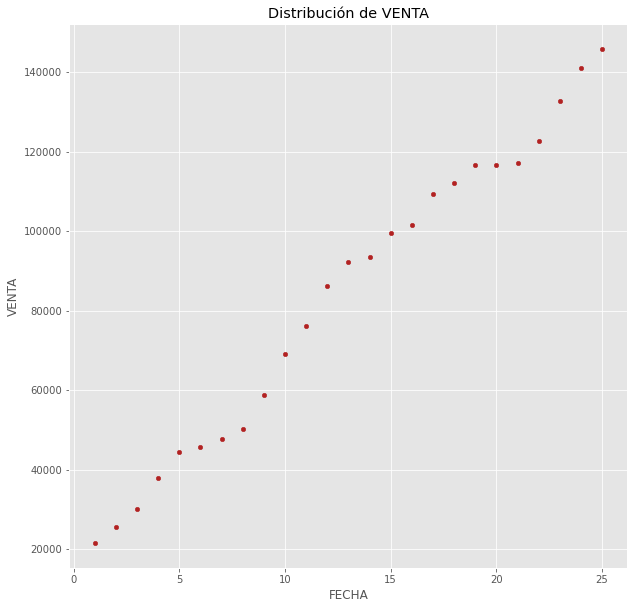

In [5]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(10,10))

df.plot(
    x    = 'FECHA',
    y    = 'VENTA',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de VENTA');

In [6]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df['FECHA'], y =  df['VENTA'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.993038928512872
P-value:  7.150777069420128e-23


In [7]:
# División de los datos en train y test
# ==============================================================================
X = df[['FECHA']]
y = df['VENTA']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [8]:
# Información del modelo
# ==============================================================================
print("Intercepto:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercepto: [18592.87139007]
Coeficiente: [('FECHA', 5050.824990373508)]
Coeficiente de determinación R^2: 0.9855279496575492


In [9]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[ 58999.47131305]
 [104456.89622642]
 [ 33745.34636119]]

El error (rmse) de test es: 4976.724092189566


In [11]:
# División de los datos en train y test
# ==============================================================================
X = df[['FECHA']]
y = df['VENTA']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [12]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1086.
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.52e-17
Time:                        23:33:49   Log-Likelihood:                -196.09
No. Observations:                  20   AIC:                             396.2
Df Residuals:                      18   BIC:                             398.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.859e+04   2457.557      7.566      0.0

In [13]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[13429.73669144, 23756.00608869],
       [ 4728.85144413,  5372.79853662]])

In [14]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,114558.546207,1237.942611,111957.725292,117159.367122,104509.050857,124608.041558
1,48897.821332,1668.633787,45392.151833,52403.490832,38577.074944,59218.567720
2,43846.996342,1791.492820,40083.209592,47610.783092,33435.743869,54258.248815
3,23643.696380,2319.398660,18770.820616,28516.572145,12782.158479,34505.234282


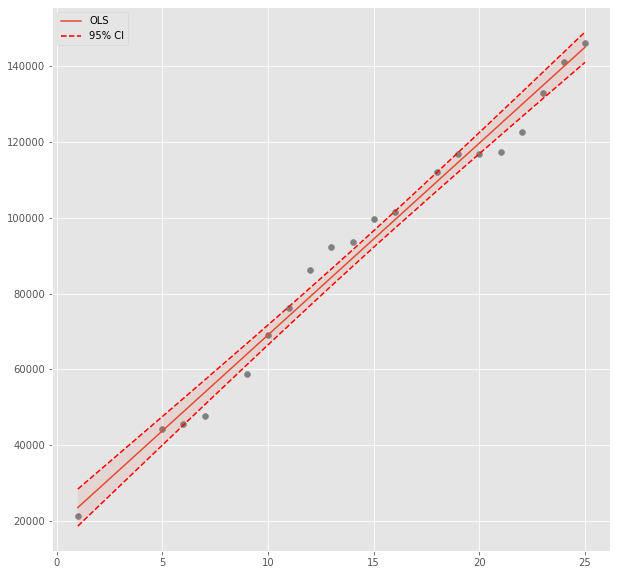

In [16]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [17]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 4976.724092189545


VENTA=5050.824990373508*FECHA+18592.87139007

R^2: 0.9855279496575492

VENTA(26)=149914.32